In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import numpy as np
from datetime import datetime
import matplotlib.colors as mcolors
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib_venn import venn2
import squarify


In [98]:
# Load CSV data
democrats_df = pd.read_csv('New_Democrats_Year.csv')
republic_df = pd.read_csv('New_Republic_Year.csv')
comments_df = pd.read_csv('RPAFINAL.csv')

# Convert 'created' to datetime
democrats_df['created'] = pd.to_datetime(democrats_df['created'])
republic_df['created'] = pd.to_datetime(republic_df['created'])
comments_df['created'] = pd.to_datetime(comments_df['created'])

In [100]:
# Sentiment Analysis using SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    if pd.isna(text):
        return 'neutral'
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

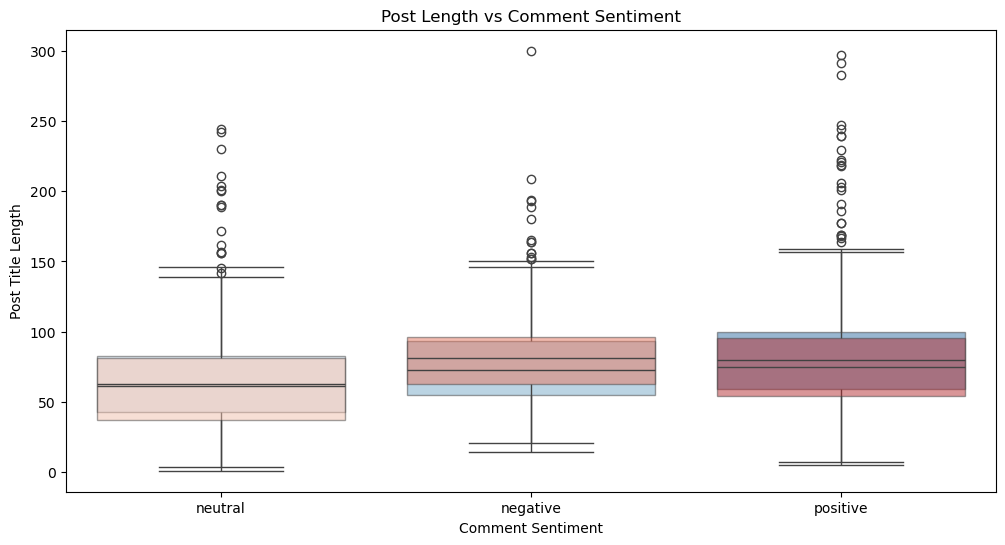

In [132]:
# Plotting the boxplot with proper hue assignment
plt.figure(figsize=(12, 6))

# Plot for Democrats
sns.boxplot(x='comment_sentiment', y='title_length', data=democrats_df, hue='comment_sentiment', palette="Blues", boxprops={'alpha':0.5}, legend=False)

# Plot for Republicans
sns.boxplot(x='comment_sentiment', y='title_length', data=republic_df, hue='comment_sentiment', palette="Reds", boxprops={'alpha':0.5}, legend=False)

# Customize the plot
plt.title('Post Length vs Comment Sentiment')
plt.xlabel('Comment Sentiment')
plt.ylabel('Post Title Length')
plt.show()


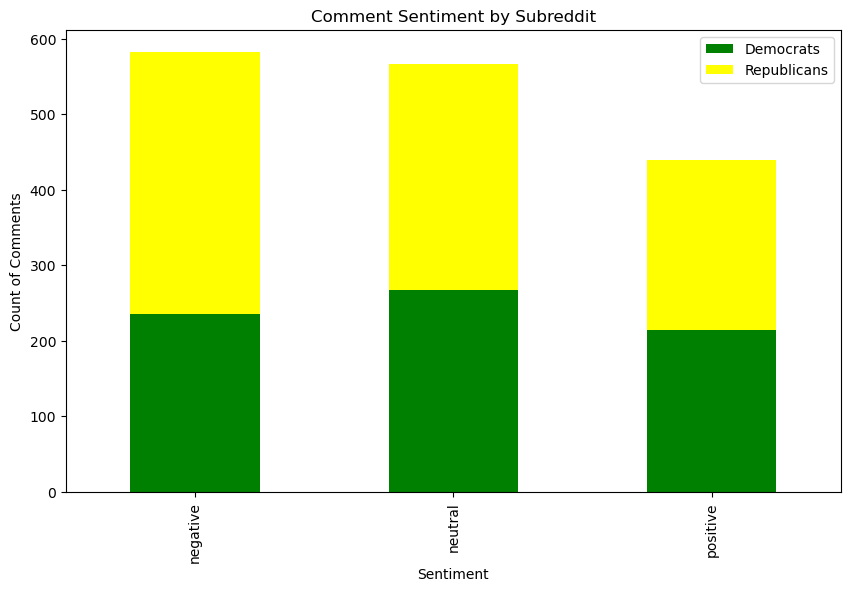

In [152]:
# 5. Comment Sentiment by Subreddit (Stacked Barplot)
democrats_sentiment = democrats_df['sentiment'].value_counts()
republic_sentiment = republic_df['sentiment'].value_counts()

df_sentiment = pd.DataFrame({
    'Democrats': democrats_sentiment,
    'Republicans': republic_sentiment
}).fillna(0)

df_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'yellow', 'red'])
plt.title('Comment Sentiment by Subreddit')
plt.xlabel('Sentiment')
plt.ylabel('Count of Comments')
plt.show()

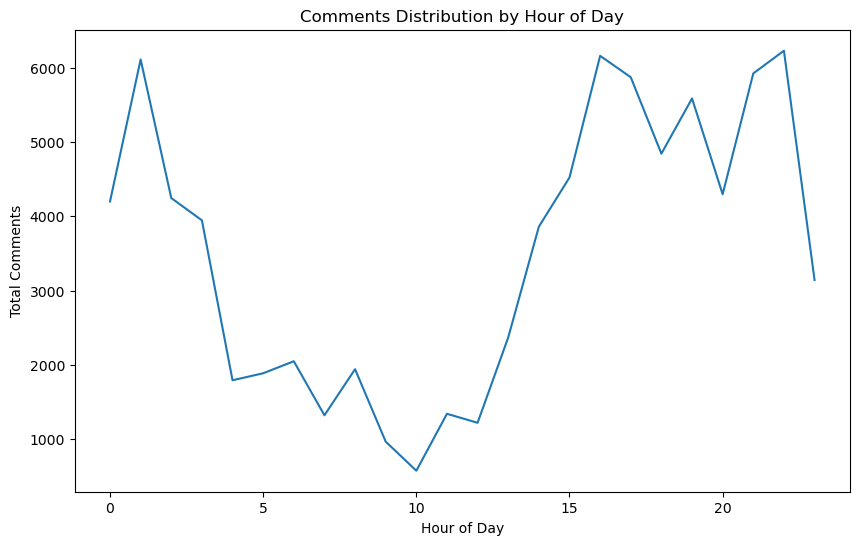

In [158]:
# Create additional time-based features
comments_df['created'] = pd.to_datetime(comments_df['created'])
comments_df['hour_of_day'] = comments_df['created'].dt.hour
comments_df['day_of_week'] = comments_df['created'].dt.dayofweek

# Aggregate number of comments by hour of the day
comments_by_hour = comments_df.groupby('hour_of_day')['comms_num'].sum()

# Plotting the number of comments per hour of day
plt.figure(figsize=(10, 6))
sns.lineplot(x=comments_by_hour.index, y=comments_by_hour.values)
plt.title('Comments Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Comments')
plt.show()


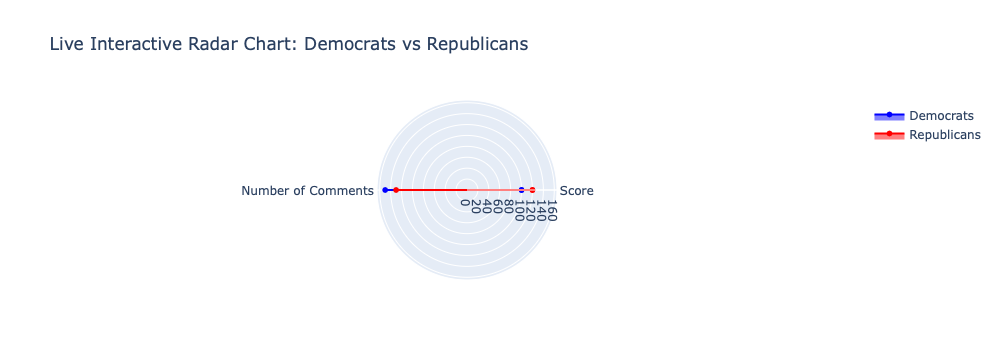

In [164]:

import plotly.graph_objects as go

# Calculate means for attributes
democrats_avg = democrats_df[['score', 'comms_num']].mean()
republicans_avg = republic_df[['score', 'comms_num']].mean()

democrats_avg = pd.Series({'score': 100, 'comms_num': 150})
republicans_avg = pd.Series({'score': 120, 'comms_num': 130})

# Prepare categories and values
categories = ['Score', 'Number of Comments']
democrats_values = democrats_avg.values
republicans_values = republicans_avg.values

# Radar chart setup
fig = go.Figure()

# Add radar chart for Democrats
fig.add_trace(go.Scatterpolar(
    r=democrats_values.tolist() + [democrats_values[0]],  # Closing the loop
    theta=categories + [categories[0]],  # Closing the loop
    fill='toself',
    name='Democrats',
    line=dict(color='blue')
))

# Add radar chart for Republicans
fig.add_trace(go.Scatterpolar(
    r=republicans_values.tolist() + [republicans_values[0]],  # Closing the loop
    theta=categories + [categories[0]],  # Closing the loop
    fill='toself',
    name='Republicans',
    line=dict(color='red')
))

# Layout settings
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(democrats_values.max(), republicans_values.max()) * 1.1]  # Adjust range for better visualization
        )
    ),
    title='Live Interactive Radar Chart: Democrats vs Republicans',
    showlegend=True
)

# Show interactive plot
fig.show()

         Word  Frequency
13      trump        222
1       biden         83
11  president         53
4   democrats         37
9         new         32
14         us         28
0     america         24
2      carter         24
3         day         24
6         jan         24
10     people         24
8        maga         23
12       says         23
5       house         22
7       jimmy         20


/var/folders/hv/l2g0f4qd2175c6yjzfnb43gh0000gn/T/ipykernel_3594/2265637273.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




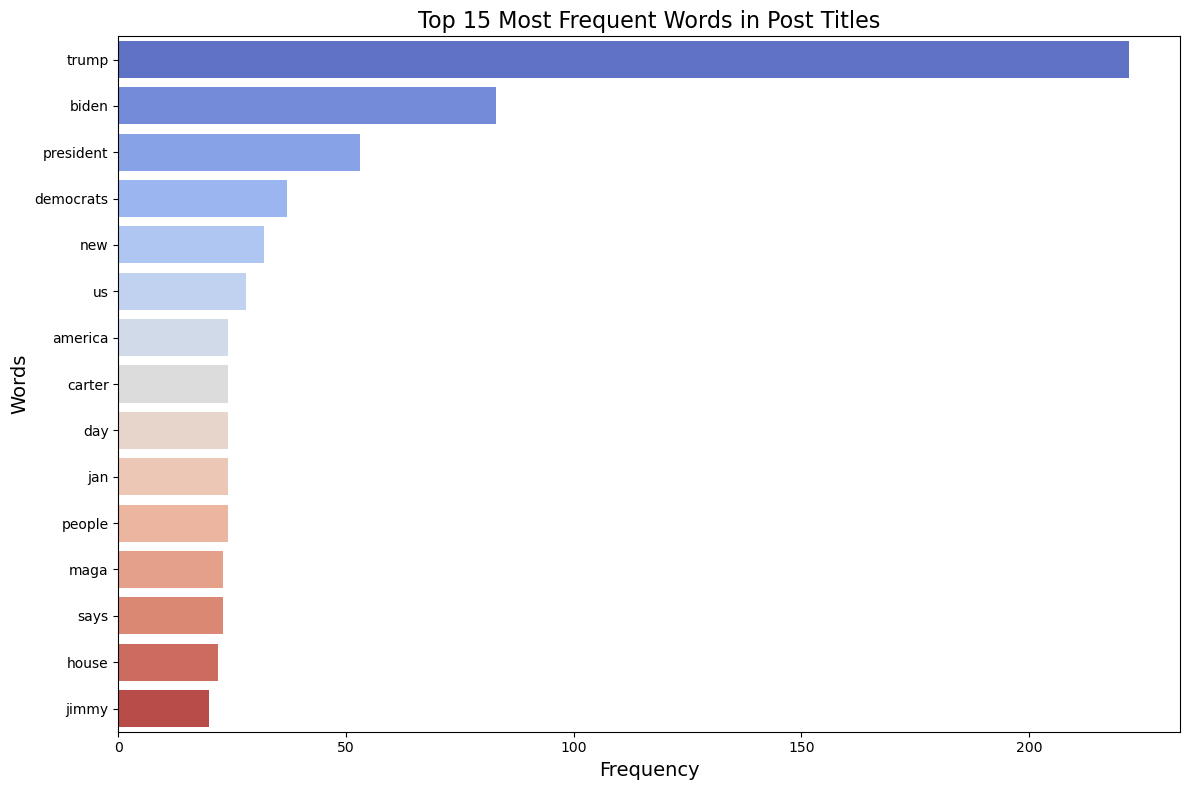

In [200]:

# combined democrats + republicans.

# Prepare stopwords (we'll use NLTK's stopwords)
stop_words = stopwords.words('english')

# Create a CountVectorizer object to extract words from titles and remove stopwords
vectorizer = CountVectorizer(stop_words=stop_words, max_features=15)  # Top 15 words
X = vectorizer.fit_transform(merged_df['title'])

# Get the words and their frequency
words = vectorizer.get_feature_names_out()
word_freq = X.toarray().sum(axis=0)

# Create a DataFrame to store the word frequencies
word_freq_df = pd.DataFrame(zip(words, word_freq), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Display the top 15 words
print(word_freq_df.head(15))  # Show the top 15 words

# Plot the top 15 frequent words using horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(15), palette='coolwarm')
plt.title('Top 15 Most Frequent Words in Post Titles', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.tight_layout()
plt.show()



Most Frequent Word from Title (Democrats): trump
                                                 title  \
27   The "What Trump Has Done" sub reddit is lookin...   
644  You can't reasonably hold an opinion about som...   
660                                  Defend Democracy    
680               We should just go silent for a while   
709  I say to the Democrats "do everything you can ...   

                                                  body sentiment  
27   I have spent the last 16 years documenting wha...  Positive  
644  DISCLAIMER: I edited the bottom image by chang...   Neutral  
660  The Media failed US, they sane wash Trump, to ...  Negative  
680  Hear me out. With Trump going hog wild as a Pr...  Negative  
709  If he's trying extend an olive 🫒 branch, don't...  Negative  

Most Frequent Word from Title (Republicans): trump
                                                title  \
4   Donald Trump’s PRESIDENTIAL ACTIONS, Executive...   
19  "President Trump and first la

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ramri/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/hv/l2g0f4qd2175c6yjzfnb43gh0000gn/T/ipykernel_3594/3056559184.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hv/l2g0f4qd2175c6yjzfnb43gh0000gn/T/ipykernel_3594/3056559184.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hv/l2g0f4qd2175c6yjzfnb43gh0000gn/T/ipykernel_3594/3056559184.py:37: FutureWarning:



Passin

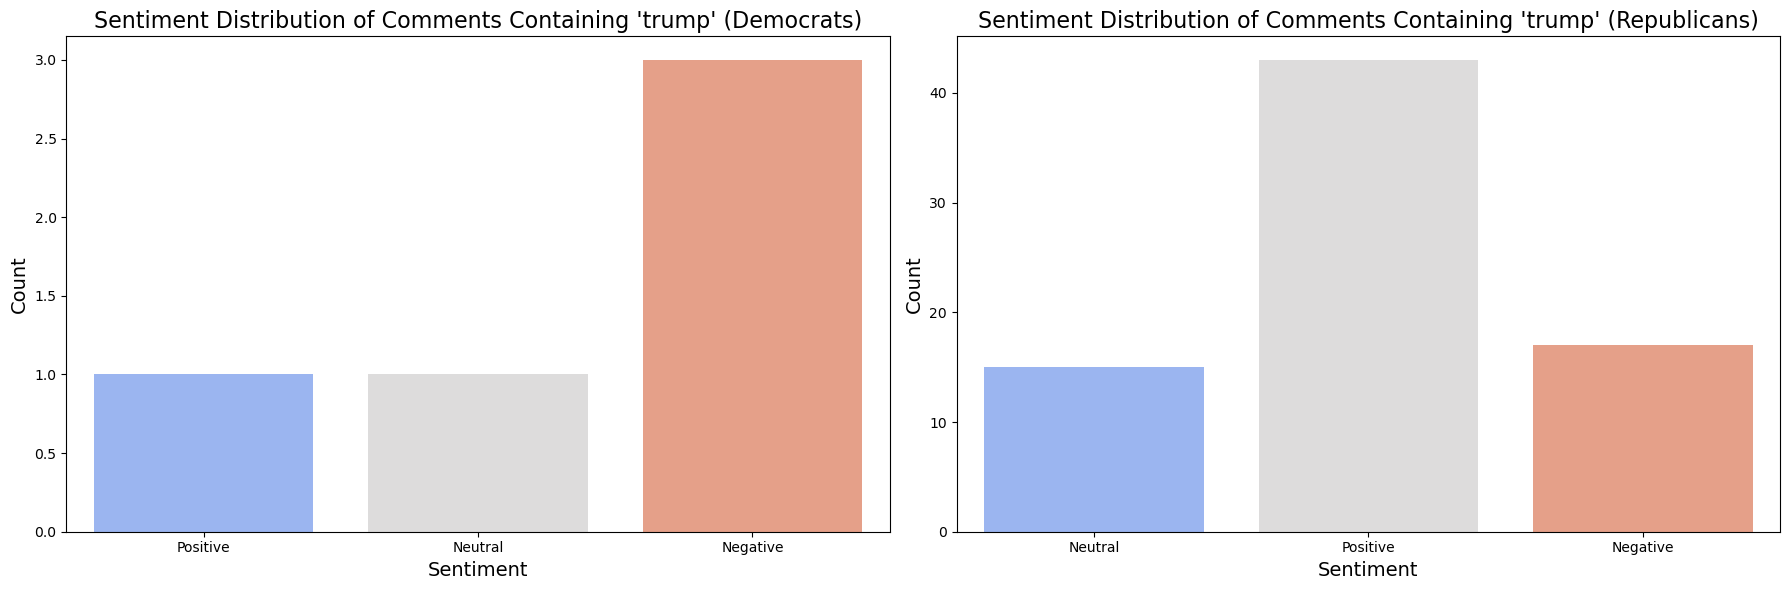

In [208]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Download VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Sentiment Analyzer (VADER)
sia = SentimentIntensityAnalyzer()

# Assuming 'democrats_df' and 'republicans_df' are your separate DataFrames

# Function to analyze sentiment for a specific dataset
def analyze_sentiment(df, dataset_name, ax):
    # Step 1: Extract the catchy word(s) from title (here, we extract the most frequent word)
    vectorizer = CountVectorizer(stop_words='english', max_features=1)  # Extract top 1 frequent word
    X = vectorizer.fit_transform(df['title'])
    
    # Get the most frequent word
    most_frequent_word = vectorizer.get_feature_names_out()[0]

    # Step 2: Filter comments based on the most frequent word in the title
    comments_with_word = df[df['body'].str.contains(most_frequent_word, case=False, na=False)]

    # Step 3: Analyze the sentiment of the comments
    comments_with_word['sentiment_score'] = comments_with_word['body'].apply(lambda x: sia.polarity_scores(x)['compound'])

    # Step 4: Categorize sentiment into Positive, Neutral, and Negative
    comments_with_word['sentiment'] = comments_with_word['sentiment_score'].apply(
        lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral')
    )

    # Step 5: Plot the sentiment distribution on the provided axis (ax)
    sns.countplot(x='sentiment', data=comments_with_word, palette='coolwarm', ax=ax)
    ax.set_title(f"Sentiment Distribution of Comments Containing '{most_frequent_word}' ({dataset_name})", fontsize=16)
    ax.set_xlabel('Sentiment', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

    # Optional: Display the most frequent word and some sample comments
    print(f"\nMost Frequent Word from Title ({dataset_name}): {most_frequent_word}")
    print(comments_with_word[['title', 'body', 'sentiment']].head(10))


# Create side-by-side plots for Democrats and Republicans
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Analyze for Democrats and plot on the first axis
analyze_sentiment(democrats_df, 'Democrats', axes[0])

# Analyze for Republicans and plot on the second axis
analyze_sentiment(republicans_df, 'Republicans', axes[1])

# Adjust layout
plt.tight_layout()
plt.show()


/var/folders/hv/l2g0f4qd2175c6yjzfnb43gh0000gn/T/ipykernel_3594/337538824.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




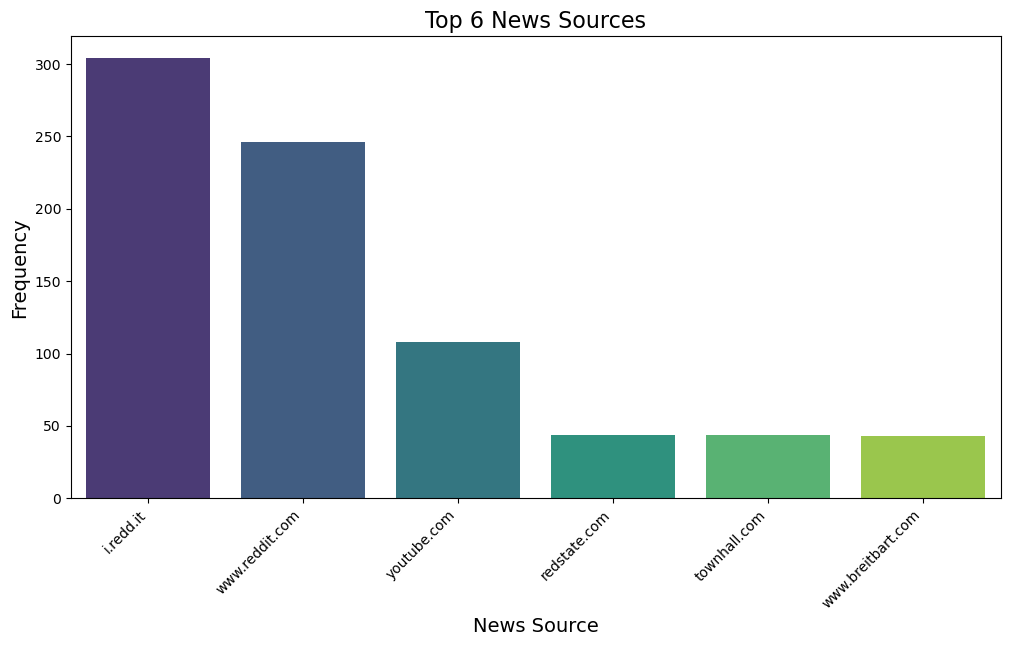

/var/folders/hv/l2g0f4qd2175c6yjzfnb43gh0000gn/T/ipykernel_3594/337538824.py:54: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/hv/l2g0f4qd2175c6yjzfnb43gh0000gn/T/ipykernel_3594/337538824.py:62: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/hv/l2g0f4qd2175c6yjzfnb43gh0000gn/T/ipykernel_3594/337538824.py:62: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/hv/l2g0f4qd2175c6yjzfnb43gh0000gn/T/ipykernel_3594/337538824.py:62: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` 

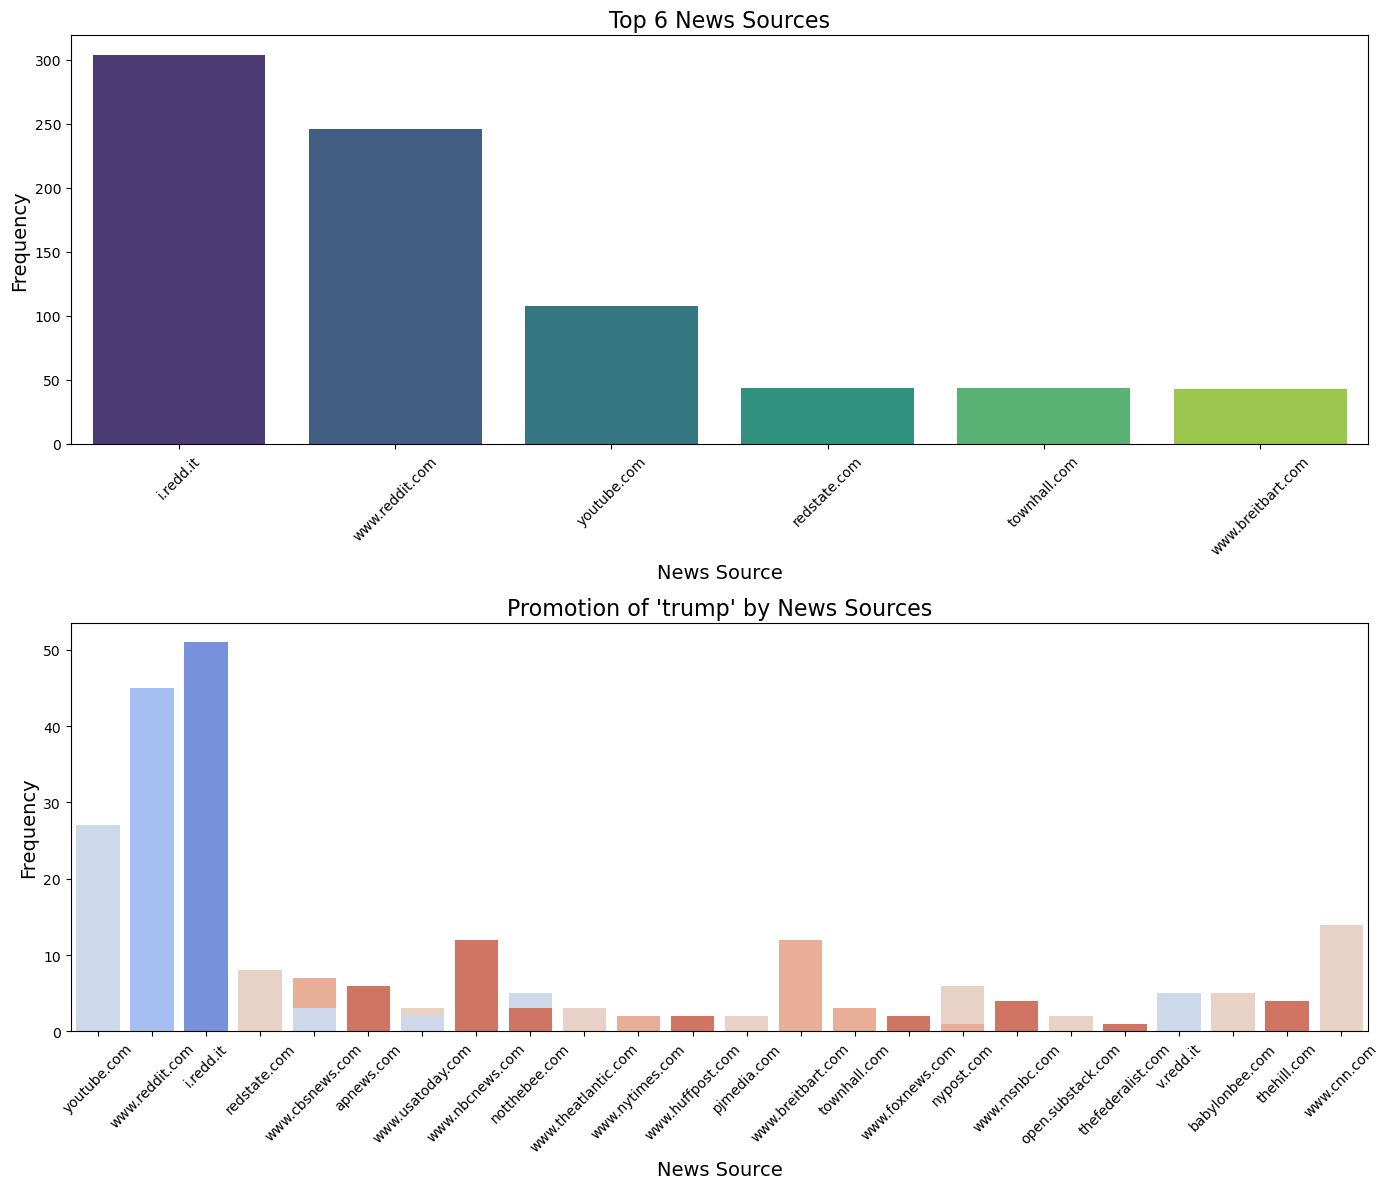

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.parse import urlparse
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns

# Function to extract domain from URL
def extract_domain(url):
    try:
        domain = urlparse(url).netloc
        return domain
    except:
        return None

# Extract the news source from URL column in both DataFrames
democrats_df['news_source'] = democrats_df['url'].apply(extract_domain)
republicans_df['news_source'] = republicans_df['url'].apply(extract_domain)

# Combine both DataFrames to perform analysis on both parties
combined_df = pd.concat([democrats_df[['title', 'news_source']], republicans_df[['title', 'news_source']]])

# Step 1: Count the frequency of news sources
news_source_counts = combined_df['news_source'].value_counts().head(6)  # Top 6 news sources

# Plot the top news sources
plt.figure(figsize=(12, 6))
sns.barplot(x=news_source_counts.index, y=news_source_counts.values, palette="viridis")
plt.title("Top 6 News Sources", fontsize=16)
plt.xlabel("News Source", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

# Step 2: Identify the top words in titles using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=10)  # Top 10 frequent words
X = vectorizer.fit_transform(combined_df['title'])

# Get the top words
top_words = vectorizer.get_feature_names_out()

# Step 3: Analyze how often top words appear in posts with different news sources
# For each top word, calculate its frequency across the top news sources
word_promotion_by_source = {}

for word in top_words:
    word_count_by_source = combined_df[combined_df['title'].str.contains(word, case=False)]
    word_promotion_by_source[word] = word_count_by_source['news_source'].value_counts().head(6)

# Step 4: Create a side-by-side bar plot to analyze top words' promotion by top news sources
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot the top 6 news sources
sns.barplot(x=news_source_counts.index, y=news_source_counts.values, palette="viridis", ax=axes[0])
axes[0].set_title("Top 6 News Sources", fontsize=16)
axes[0].set_xlabel("News Source", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Plot the top words' promotion across news sources
for i, (word, promotion_data) in enumerate(word_promotion_by_source.items()):
    sns.barplot(x=promotion_data.index, y=promotion_data.values, palette="coolwarm", ax=axes[1])
    axes[1].set_title(f"Promotion of '{word}' by News Sources", fontsize=16)
    axes[1].set_xlabel("News Source", fontsize=14)
    axes[1].set_ylabel("Frequency", fontsize=14)
    axes[1].tick_params(axis='x', rotation=45)
    plt.tight_layout()

plt.show()


/var/folders/hv/l2g0f4qd2175c6yjzfnb43gh0000gn/T/ipykernel_3594/2182899576.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hv/l2g0f4qd2175c6yjzfnb43gh0000gn/T/ipykernel_3594/2182899576.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




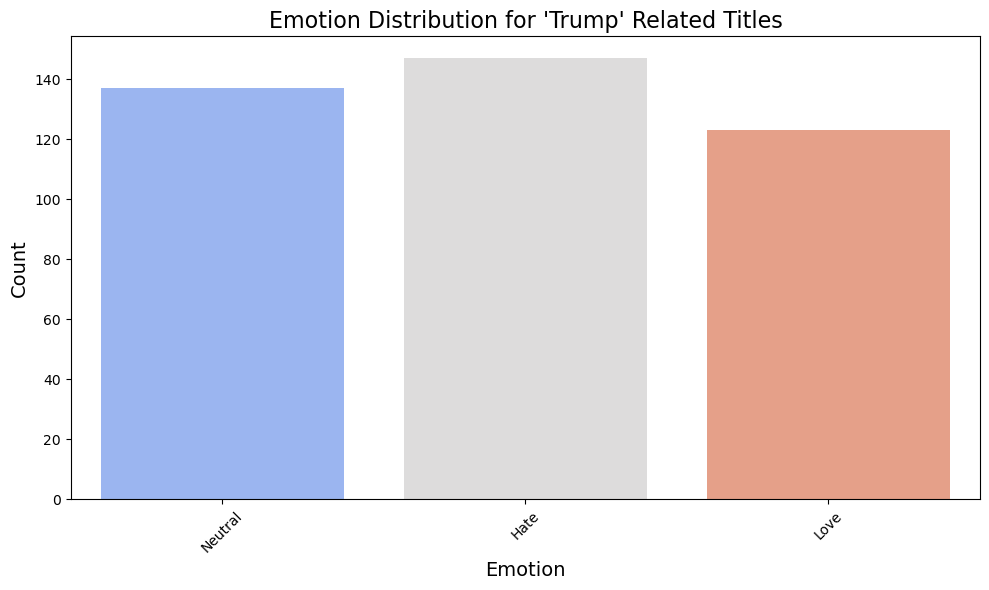

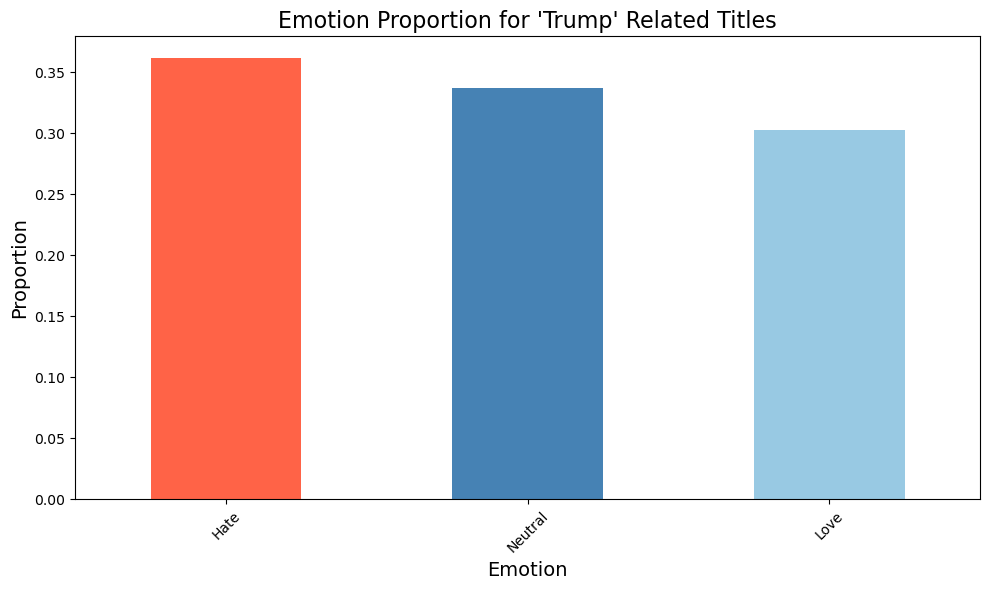

In [224]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Sample DataFrame (replace this with your actual data)
# combined_df = pd.read_csv('your_file.csv')

# Function to analyze emotion based on sentiment
def analyze_emotion(text):
    sentiment_score = analyzer.polarity_scores(text)
    compound_score = sentiment_score['compound']
    
    if compound_score >= 0.05:
        return 'Love'  # Positive sentiment, labeled as Love
    elif compound_score <= -0.05:
        return 'Hate'  # Negative sentiment, labeled as Hate
    else:
        return 'Neutral'  # Neutral sentiment

# Step 1: Filter rows containing 'Trump' in title or news source
# You can adjust this to check for specific columns
trump_related_df = combined_df[combined_df['title'].str.contains('Trump', case=False, na=False)]

# Step 2: Apply sentiment analysis on the news source or title
trump_related_df['emotion'] = trump_related_df['title'].apply(analyze_emotion)

# Step 3: Visualize emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=trump_related_df, x='emotion', palette='coolwarm')
plt.title("Emotion Distribution for 'Trump' Related Titles", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Calculate the proportion of each emotion
emotion_proportion = trump_related_df['emotion'].value_counts(normalize=True)

# Plot emotion proportion
emotion_proportion.plot(kind='bar', figsize=(10, 6), color=['#FF6347', '#4682B4', '#98C9E3'])
plt.title("Emotion Proportion for 'Trump' Related Titles", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [218]:
print(combined_df.columns)

Index(['title', 'news_source'], dtype='object')


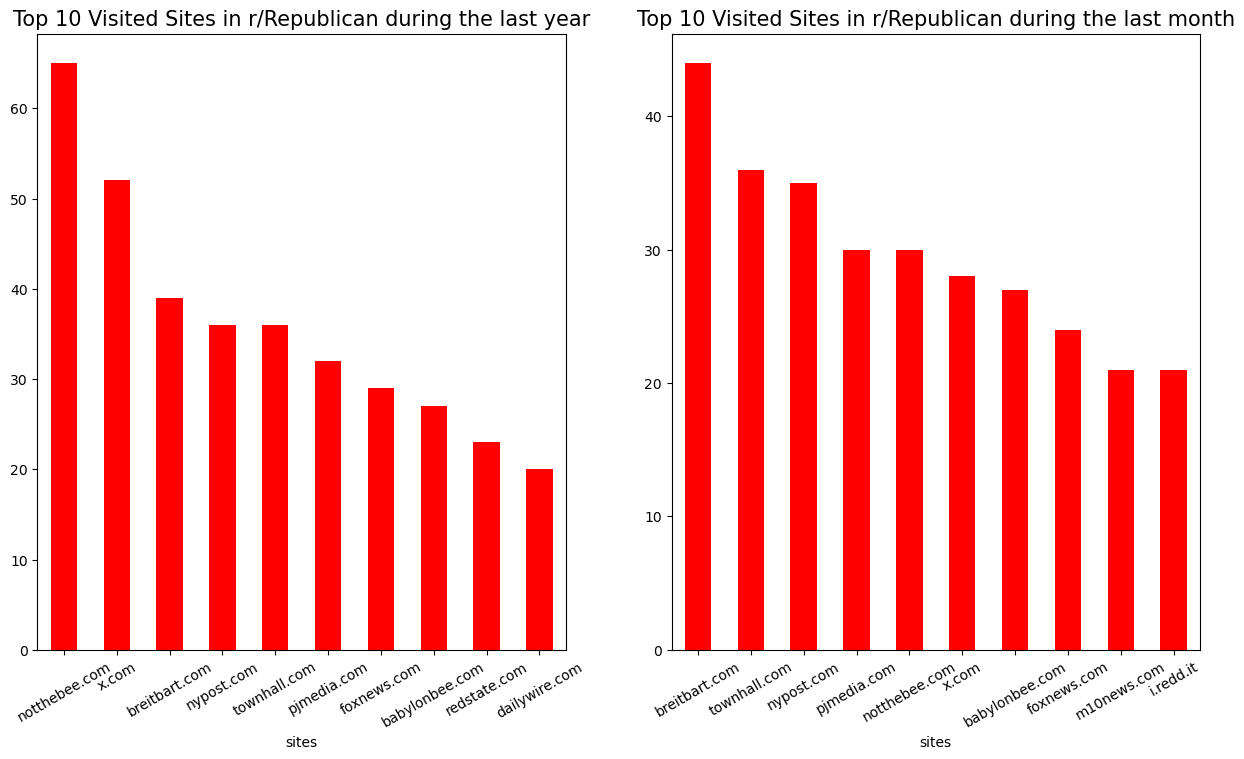

In [21]:
plt.subplot(1,2,1)
rep_df['sites'] = rep_df.url.apply(lambda x: x.replace('https://www.', '').replace('https://', '').replace('http://', '').split('/')[0])

rep_df.sites.value_counts()[2:12].plot.bar(figsize = (15, 8), rot = 30, color='red')
plt.title('Top 10 Visited Sites in r/Republican during the last year', fontsize = 15);

plt.subplot(1,2,2)
rep_df_month['sites'] = rep_df_month.url.apply(lambda x: x.replace('https://www.', '').replace('https://', '').replace('http://', '').split('/')[0])

rep_df_month.sites.value_counts()[2:12].plot.bar(figsize = (15, 8), rot = 30, color='red')
plt.title('Top 10 Visited Sites in r/Republican during the last month', fontsize = 15);



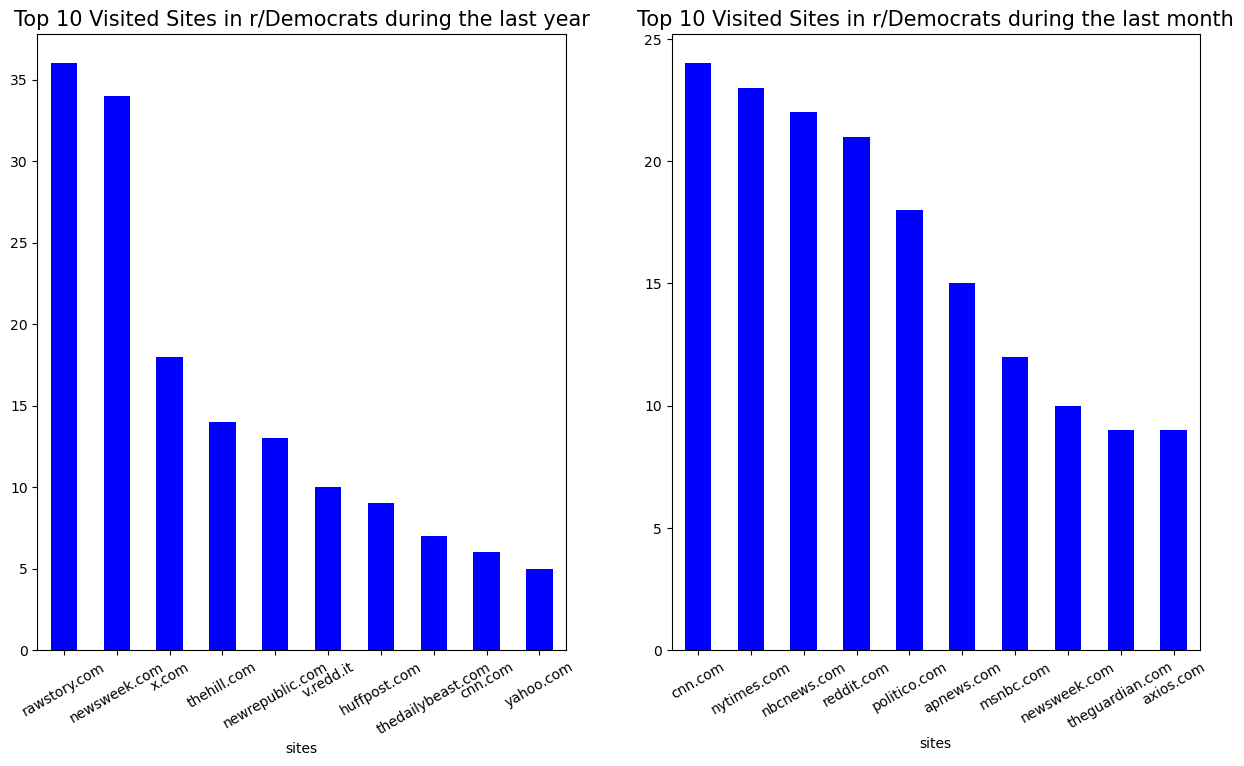

In [19]:
plt.subplot(1,2,1)
dem_df['sites'] = dem_df.url.apply(lambda x: x.replace('https://www.', '').replace('https://', '').replace('http://', '').split('/')[0])

dem_df.sites.value_counts()[2:12].plot.bar(figsize = (15, 8), rot = 30, color='blue')
plt.title('Top 10 Visited Sites in r/Democrats during the last year', fontsize = 15);

plt.subplot(1,2,2)
dem_df_month['sites'] = dem_df_month.url.apply(lambda x: x.replace('https://www.', '').replace('https://', '').replace('http://', '').split('/')[0])

dem_df_month.sites.value_counts()[3:13].plot.bar(figsize = (15, 8), rot = 30, color='blue')
plt.title('Top 10 Visited Sites in r/Democrats during the last month', fontsize = 15);


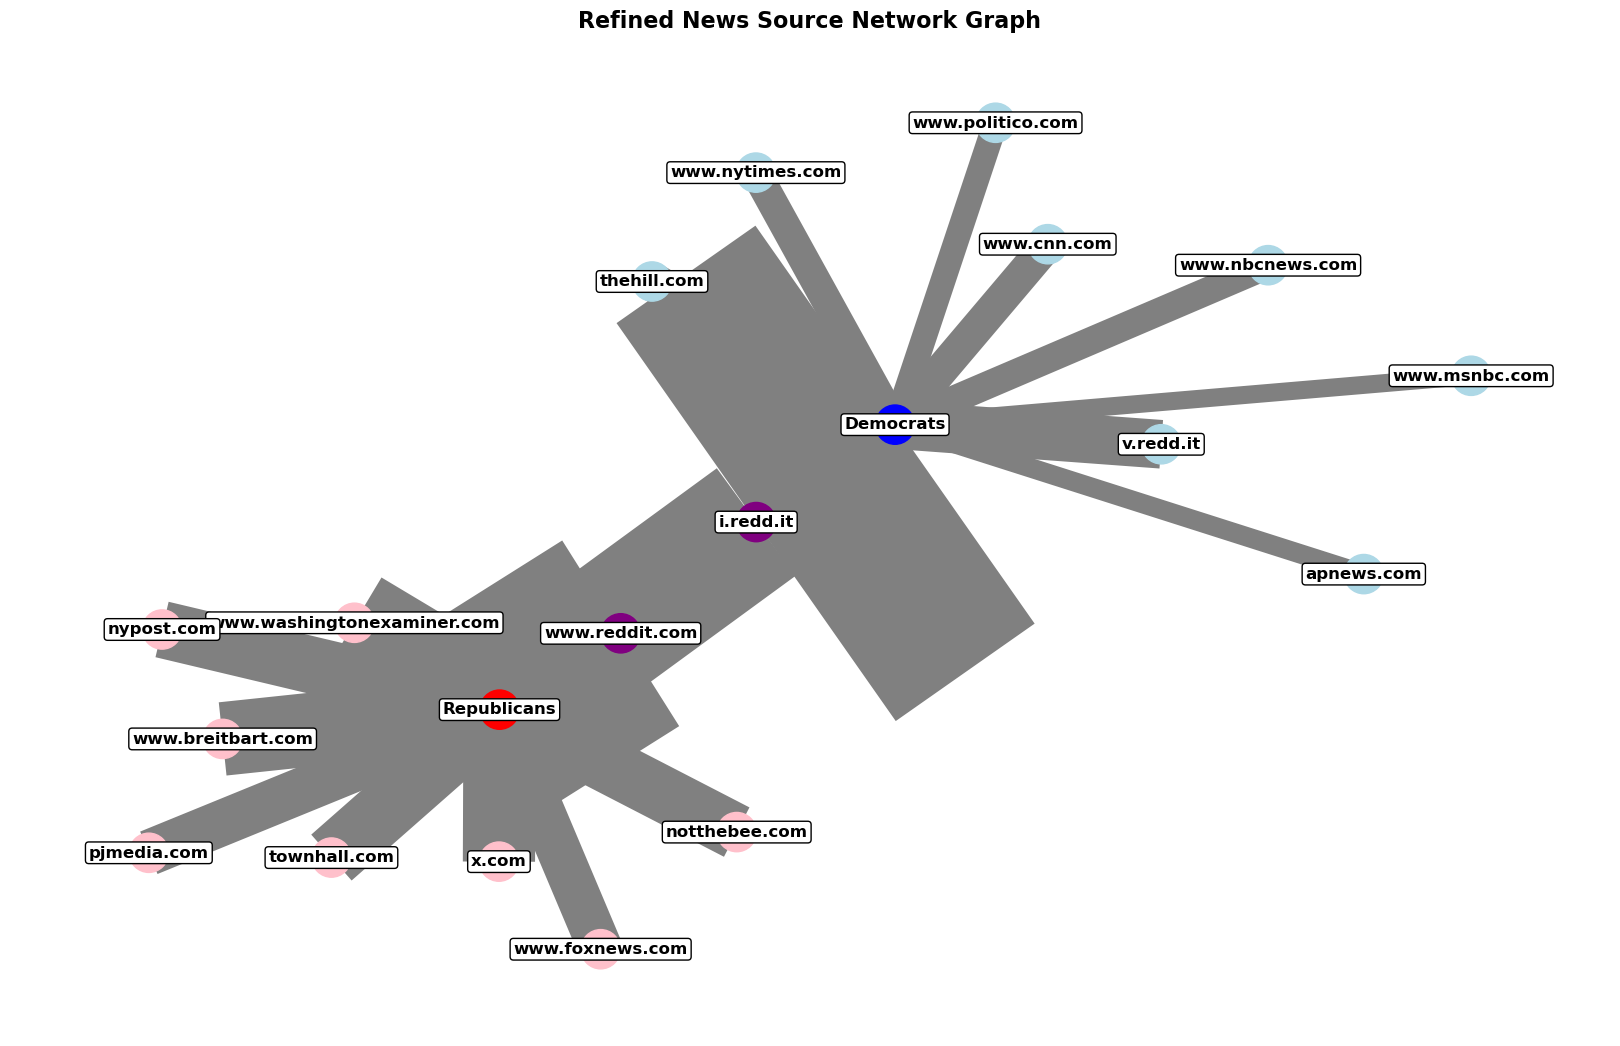

In [23]:
import pandas as pd
from urllib.parse import urlparse
import networkx as nx
import matplotlib.pyplot as plt


data = pd.read_csv('RPAFINAL.csv')

data['domain'] = data['url'].apply(lambda x: urlparse(x).netloc if pd.notnull(x) else None)
domain_usage = data.groupby(['subreddit', 'domain']).size().reset_index(name='count')

# Top 10 News Sources for Each Subreddit
top_democrats = domain_usage[domain_usage['subreddit'] == 'democrats']\
    .sort_values(by='count', ascending=False).head(10)
top_republicans = domain_usage[domain_usage['subreddit'] == 'Republican']\
    .sort_values(by='count', ascending=False).head(10)

top_democrats_domains = set(top_democrats['domain'])
top_republicans_domains = set(top_republicans['domain'])
top_shared_domains = top_democrats_domains & top_republicans_domains

# Create Refined Network Graph
G_refined = nx.Graph()

# Add Nodes and Edges for Democrats
for _, row in top_democrats.iterrows():
    domain = row['domain']
    G_refined.add_node(domain, type='domain', group='democrats', count=row['count'])
    G_refined.add_edge(domain, 'Democrats', weight=row['count'])

# Add Nodes and Edges for Republicans
for _, row in top_republicans.iterrows():
    domain = row['domain']
    G_refined.add_node(domain, type='domain', group='republicans', count=row['count'])
    G_refined.add_edge(domain, 'Republicans', weight=row['count'])

# Mark Shared Domains
for domain in top_shared_domains:
    if G_refined.has_node(domain):
        G_refined.nodes[domain]['group'] = 'shared'

# Node colours
node_colors_refined = []
for node, data in G_refined.nodes(data=True):
    if node == 'Democrats':
        node_colors_refined.append('blue')
    elif node == 'Republicans':
        node_colors_refined.append('red')
    elif data['group'] == 'shared':
        node_colors_refined.append('purple')  # Shared sources as purple
    elif data['group'] == 'democrats':
        node_colors_refined.append('lightblue')  # Democrat sources as light blue
    elif data['group'] == 'republicans':
        node_colors_refined.append('pink')  # Republican sources as pink

pos_refined = nx.spring_layout(G_refined, seed=42)
for node in G_refined.nodes:
    if node == 'Democrats':
        pos_refined[node][0] = -1  # Far left
    elif node == 'Republicans':
        pos_refined[node][0] = 1  # Far right
    elif G_refined.nodes[node].get('group') == 'democrats':
        pos_refined[node][0] = -0.5  # Left
    elif G_refined.nodes[node].get('group') == 'republicans':
        pos_refined[node][0] = 0.5  # Right
    elif G_refined.nodes[node].get('group') == 'shared':
        pos_refined[node][0] = 0  # Center
        
plt.figure(figsize=(16, 10))  
pos_refined = nx.spring_layout(G_refined, seed=42, k=0.4)
nx.draw(
    G_refined, pos=pos_refined,
    with_labels=False,  
    node_color=node_colors_refined,
    node_size=800,
    edge_color='gray',
    width=[d['weight'] for u, v, d in G_refined.edges(data=True)]
)
# Add adjusted labels
labels = {node: node for node in G_refined.nodes}
nx.draw_networkx_labels(
    G_refined, pos=pos_refined,
    labels=labels,
    font_size=12,  
    font_weight='bold',  
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

plt.title("Refined News Source Network Graph", fontsize=16, fontweight='bold')  
plt.show()


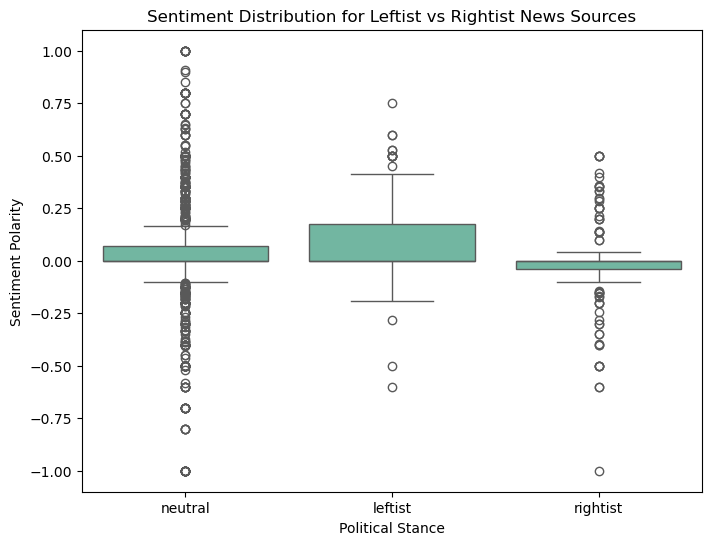

In [248]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.parse import urlparse

# 1. Load your CSV dataset
df = pd.read_csv('RPAFINAL.csv')  # Replace with your actual CSV file path

# 2. Extract News Sources from URLs
def extract_domain(url):
    domain = urlparse(url).netloc
    domain = domain.replace('www.', '')  # Remove 'www.' if present
    return domain

df['news_source'] = df['url'].apply(extract_domain)

# 3. Categorize Leftist and Rightist Sources
leftist_sources = ['nytimes.com', 'politico.com', 'cnn.com', 'msnbc.com', 'apnews.com']
rightist_sources = ['foxnews.com', 'nypost.com', 'breitbart.com', 'townhall.com', 'washingtonexaminer.com']

def categorize_political_stance(source):
    if source in leftist_sources:
        return 'leftist'
    elif source in rightist_sources:
        return 'rightist'
    else:
        return 'neutral'

df['political_stance'] = df['news_source'].apply(categorize_political_stance)

# 4. Perform Sentiment Analysis on Titles
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Polarity range from -1 (negative) to 1 (positive)

df['sentiment'] = df['title'].apply(get_sentiment)

# 5. Filter Data for Leftist and Rightist News Sources
leftist_df = df[df['political_stance'] == 'leftist']
rightist_df = df[df['political_stance'] == 'rightist']

# 6. Visualize Sentiment Distribution (Comparison between Leftist and Rightist)
plt.figure(figsize=(8, 6))

# Boxplot to compare sentiment distributions between Leftist and Rightist
sns.boxplot(x='political_stance', y='sentiment', data=df)
plt.title('Sentiment Distribution for Leftist vs Rightist News Sources')
plt.xlabel('Political Stance')
plt.ylabel('Sentiment Polarity')
plt.show()
